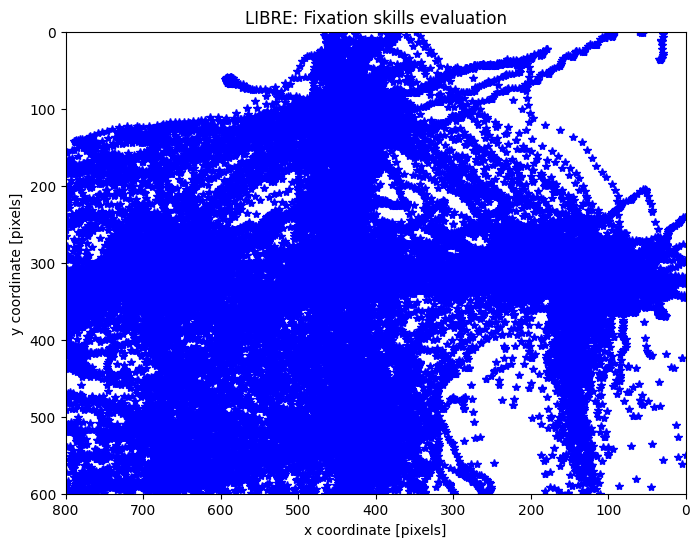

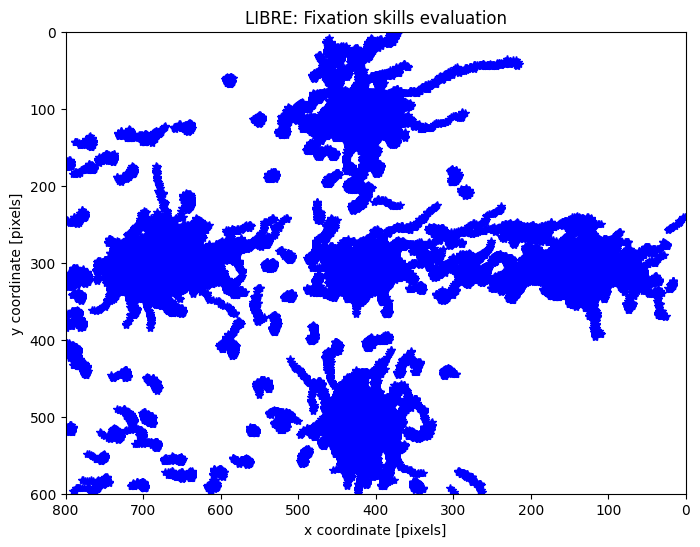

In [80]:
# Example data (replace with your actual data)
X_coord = coor_data_LIBRE_raw['x_coordinate']
Y_coord = coor_data_LIBRE_raw['y_coordinate']
fig, ax= plt.subplots(figsize=(8, 6))
# Plot the data, flipping X coordinates and using dots as markers
plt.plot(X_coord, Y_coord, '*', color='blue')
plt.xlim((0, 800))
plt.ylim((0, 600))
# Set plot title
plt.title('LIBRE: Fixation skills evaluation')
plt.xlabel('x coordinate [pixels]')
plt.ylabel('y coordinate [pixels]')
# Reverse the direction of the Y-axis
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# ============================================================
# Example data (replace with your actual data)
X_coord = coor_data_LIBRE['x_coordinate']
Y_coord = coor_data_LIBRE['y_coordinate']
fig, ax= plt.subplots(figsize=(8, 6))
# Plot the data, flipping X coordinates and using dots as markers
plt.plot(X_coord, Y_coord, '*', color='blue')
plt.xlim((0, 800))
plt.ylim((0, 600))
# Set plot title
plt.title('LIBRE: Fixation skills evaluation')
plt.xlabel('x coordinate [pixels]')
plt.ylabel('y coordinate [pixels]')
# Reverse the direction of the Y-axis
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
# ============================================================


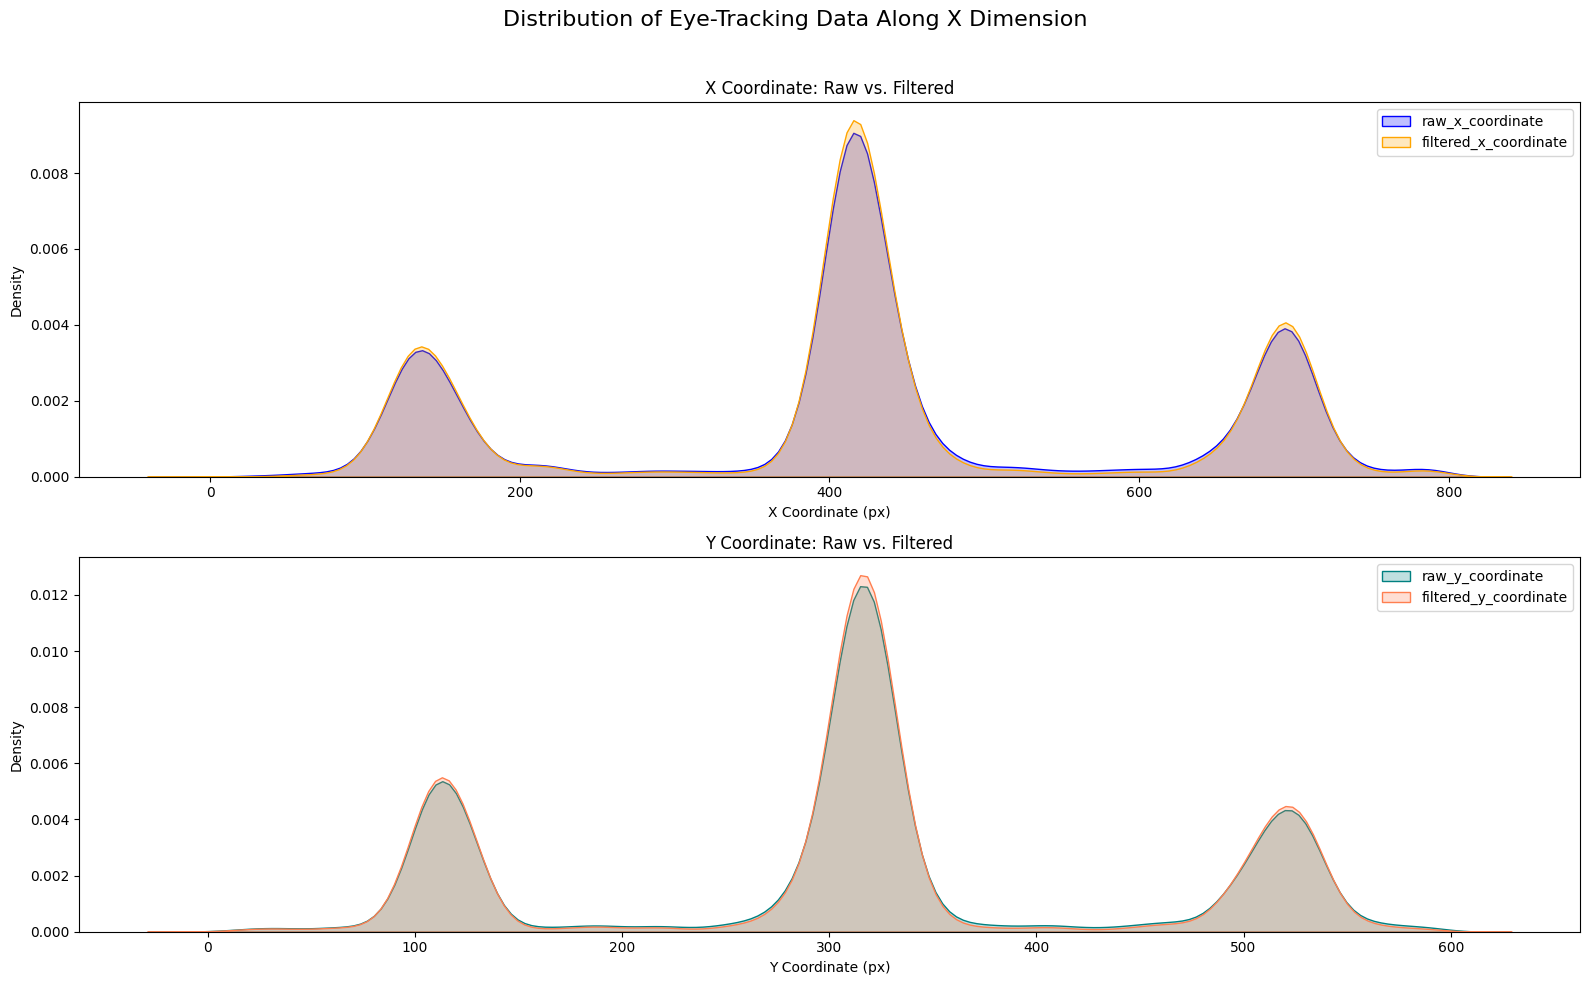

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot KDE for eye1_x_coordinate
sns.kdeplot(coor_data_LIBRE_raw['x_coordinate'].dropna(), ax=axes[0], color='blue', fill=True, label='raw_x_coordinate')
sns.kdeplot(coor_data_LIBRE['x_coordinate'].dropna(), ax=axes[0], color='orange', fill=True, label='filtered_x_coordinate')
axes[0].set_title("X Coordinate: Raw vs. Filtered")
axes[0].set_xlabel("X Coordinate (px)")
axes[0].set_ylabel("Density")
# axes[0].set_xlim((250,550))
axes[0].legend()

# Plot KDE for y coordinate
sns.kdeplot(coor_data_LIBRE_raw["y_coordinate"].dropna(), ax=axes[1], color='teal', fill=True, label='raw_y_coordinate')
sns.kdeplot(coor_data_LIBRE["y_coordinate"].dropna(), ax=axes[1], color='coral', fill=True, label='filtered_y_coordinate')
axes[1].set_title("Y Coordinate: Raw vs. Filtered")
axes[1].set_xlabel("Y Coordinate (px)")
axes[1].set_ylabel("Density")
# axes[1].set_xlim((250,350))
axes[1].legend()

# Add a common title
fig.suptitle("Distribution of Eye-Tracking Data Along X Dimension", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

time length: 657418
[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
len of intervals 132 in label_correction
index-33: label corrected, count of valid points is less than half of interval
index-41: label corrected, count of valid points is less than half 

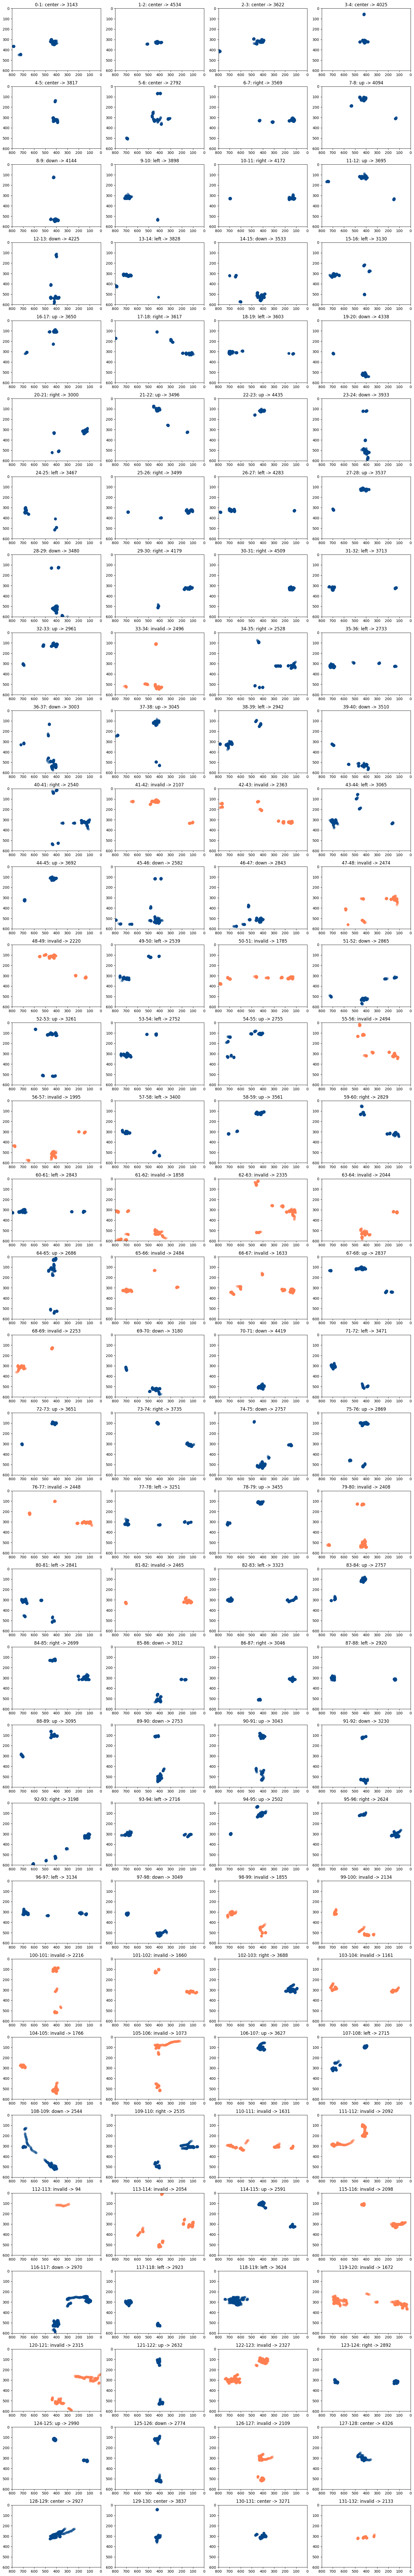

In [82]:
def classify_gaze_region(X_coord, Y_coord,interval=5000, sb_delay=0, display=False):
    from collections import Counter
    
    time_len = len(X_coord)
    print(f'time length: {len(X_coord)}')
    # label the dot position
    x_left_range = [600,800]
    x_right_range = [0, 200]
    x_center_range = [300, 500]
    
    y_up_range = [0, 200]
    y_down_range = [400, 600]
    y_center_range = [200, 400]
    labels = []
    counts = []
    # if most of x within x_left_range and most of y within y_center_range: label.append('left')
    # elif most of x within x_right_range and most of y within y_center_range: label.append('right')
    # elif most of x within x_center_range and most of y within y_center_range: label.append('center')
    # elif most of x within x_center_range and most of y within y_up_range: label.append('up')
    # elif most of x within x_center_range and most of y within y_down_range: label.append('down')
    for start_time in range(sb_delay, int(time_len), interval):
        end_time = start_time + interval
        x_interval = X_coord[start_time:end_time]
        y_interval = Y_coord[start_time:end_time]
        
        # Calculate counts for each region
        left_count = within_2d_range(x_interval, y_interval, x_left_range, y_center_range)
        right_count = within_2d_range(x_interval, y_interval, x_right_range, y_center_range)
        center_count = within_2d_range(x_interval, y_interval, x_center_range, y_center_range)
        up_count = within_2d_range(x_interval, y_interval, x_center_range, y_up_range)
        down_count = within_2d_range(x_interval, y_interval, x_center_range, y_down_range)
    
        region_counts = {
            'left': left_count,
            'right': right_count,
            'center': center_count,
            'up': up_count,
            'down': down_count,
        }
        
        max_label, max_count = max(region_counts.items(), key=lambda item: item[1])
        # Append the result
        if max_count > 0:
            labels.append(max_label)
            counts.append(max_count)
        else:
            labels.append('unknown')
            counts.append(0)
        
    if display:
        for i, label in enumerate(labels):
            print(f'Interval {i}-{(i+1)}: {label} -> {counts[i]}')

    return labels, counts



X_coord = coor_data_LIBRE['x_coordinate']
Y_coord = coor_data_LIBRE['y_coordinate']
labels,counts = classify_gaze_region(X_coord, Y_coord,interval=5000, sb_delay=0, display=False)
labels = label_correction(labels, counts, intervals=5000)
sb_delay = 0
# sb_delay=0
num_rows=33
num_cols=4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 3*num_rows))
axes = axes.flatten()
invalid_indices = [i for i, element in enumerate(labels) if element == "invalid"]
print(invalid_indices)
for i, ax in enumerate(axes):
    x = X_coord[(i)*5000+sb_delay:(i+1)*5000-100]
    y = Y_coord[(i)*5000+sb_delay:(i+1)*5000-100]
    if i in invalid_indices:
        ax.scatter(x, y, c='coral', alpha=0.1, edgecolors='coral')
    else:
        ax.scatter(x, y, c='#00468b', alpha=0.1, edgecolors='#00468b')
    ax.set_title(f'{i}-{i+1}: {labels[i]} -> {counts[i]}')
    ax.set_xlim([0, 800])
    ax.set_ylim([0, 600])
    ax.invert_xaxis()
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [83]:
check_pupil = False
if check_pupil:
    fig = plt.figure(figsize=(16, 2))
    plt.plot(
        t_axis,
        recording["pupil_size"].values,
    )

    plt.xlabel("time [s]")
    plt.ylabel("pupil area [a.u.]");

    fig = plt.figure(figsize=(16, 2))
    plt.plot(
        t_axis,
        recording["pupil_size"].values,
    )
    plt.title("Zoom In - Pupil Area")
    plt.xlabel("time [s]")
    plt.ylabel("pupil area [a.u.]")
    # JB1 (100, 150)
    plt.xlim((100, 150))
    
check_blink = False
if check_blink:
    fig = plt.figure(figsize=(16, 2))
    plt.plot(
        t_axis,
        recording["blink"].values,
    )
    plt.title("Blink Event")
    plt.xlabel("time [s]")
    plt.ylabel("eyes closed");

    fig = plt.figure(figsize=(16, 2))
    plt.plot(
        t_axis,
        recording["blink"].values * 10000,
    )
    plt.xlabel("time [s]")
    plt.ylabel("eyes closed")
    plt.title("Zoom in - Blink Event")
    plt.xlim((100, 150))
    
plot_pupil_blink = False
if plot_pupil_blink:
    fig = plt.figure(figsize=(16, 2))

    plt.plot(
        t_axis,
        recording["pupil_size"].values,
    )

    plt.plot(
        t_axis,
        recording["blink"].values * 5000,
    )

    plt.xlabel("time [s]")
    plt.ylabel("pupil area [a.u.]")
    plt.xlim((100, 140))
    plt.title('Pupil area and blinking')

    print(f'At this time, since blinking is detected, we cannot get clear pupil area ?')


Check_saccading=False
if Check_saccading:
    fig = plt.figure(figsize=(16, 2))
    plt.plot(
        t_axis,
        recording["saccade"].values,
    )
    plt.title("Saccade Event")
    plt.xlabel("time [s]")
    plt.ylabel("eyes closed");

    fig = plt.figure(figsize=(16, 2))
    plt.plot(
        t_axis,
        recording["saccade"].values * 10000,
    )
    plt.xlabel("time [s]")
    plt.ylabel("eyes closed")
    plt.title("Zoom in - Saccade Event")
    plt.xlim((100, 150))